In [1]:
%load_ext sql

In [2]:
%sql postgresql://postgres@psql:5432/postgres

'Connected: postgres@postgres'

Find the country whose GDP has grown the most over time and plot the level of education on the x axis and the life expectancy on the y axis. Do the same thing for the country whose GDP has grown the least over time

In [8]:
%%sql
drop view max;
create view max as
select location, max(time) as time from gdp group by location

Done.
Done.


[]

In [10]:
%%sql
drop view min;
create view min as
select location, min(time) as time from gdp group by location

Done.
Done.


[]

In [12]:
%%sql
drop view maxexp;
create view maxexp as
select location, avg(value) from max join gdp using(location, time) group by location order by location asc

Done.
Done.


[]

In [14]:
%%sql
drop view minexp;
create view minexp as
select location, avg(value) from min join gdp using(location, time) group by location order by location asc

Done.
Done.


[]

In [16]:
%%sql
drop view growth;
create view growth as
select location, (maxexp.avg-minexp.avg)/minexp.avg*100 as gro from minexp join maxexp using (location) order by gro asc

Done.
Done.


[]

To find out the average 

In [80]:
%%sql
select * from growth

56 rows affected.


location,gro
4,23.0186781335712
50,31.136480067106
51,62.9660185864235
22,67.6481176742355
45,84.0333087514908
59,116.065797142827
40,116.788760453451
46,136.237664072809
9,155.630636523226
55,172.806145376266


In [17]:
%%sql
create view maxlife as
select location, max(time) as time from life where location = 4 group by location

Done.


[]

In [18]:
%%sql
create view bralife as
select location, time, avg(value) as value from life
where life.location = 4
group by time, location
order by time asc

Done.


[]

In [19]:
%%sql
create view brasilian as
select education. location, education.time, avg(education.value) as eduscore, avg(bralife.value) as lifeexp from education
join bralife using(time)
where education.location = 4
group by education.time, education.location
order by education.time asc

Done.


[]

In [20]:
import matplotlib.pyplot as plt

In [21]:
result = %sql select eduscore, lifeexp from brasilian

8 rows affected.


<function matplotlib.pyplot.show>

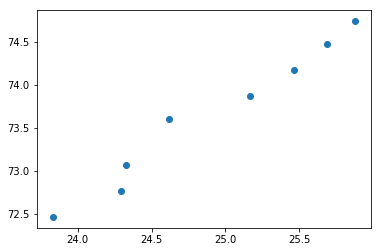

In [22]:
list1, list2 = zip(*result)
plt.scatter(list1,list2)
plt.show

In [23]:
%%sql
create view minlife as
select location, max(time) as time from life where location = 28 group by location

Done.


[]

In [24]:
%%sql
create view kolife as
select location, time, avg(value) as value from life
where life.location = 28
group by time, location
order by time asc

Done.


[]

In [26]:
%%sql
create view korea as
select education. location, education.time, avg(education.value) as eduscore, avg(kolife.value) as lifeexp from education
join kolife using(time)
where education.location = 28
group by education.time, education.location
order by education.time asc

Done.


[]

In [27]:
result = %sql select eduscore, lifeexp from korea

20 rows affected.


<function matplotlib.pyplot.show>

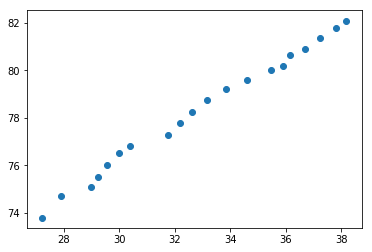

In [28]:
list1, list2 = zip(*result)
plt.scatter(list1,list2)
plt.show